In [ ]:
# Scenario Question: Predicting Titanic Survival
# Researchers are studying the Titanic disaster and want to build models that predict whether a
#  passenger would survive or not survive based on their information.
# - Features used:
# - Passenger class (pclass)
# - Gender (sex)
# - Age (age)
# - Number of siblings/spouses aboard (sibsp)
# - Number of parents/children aboard (parch)
# - Ticket fare (fare)
# - Label:
# - 1 = Survived
# - 0 = Died
# The researchers train three different models:
# - Logistic Regression
# - K-Nearest Neighbors (KNN) with k=5
# - Decision Tree with max depth = 4
# They then evaluate each model using a classification report (precision, recall, F1-score, accuracy).

# ❓ Questions for Learners
# - Which model performs best at predicting survival, and why?
# - How does Logistic Regression differ from Decision Tree in terms of interpretability?
# # - Why is scaling applied before training Logistic Regression and KNN, but not strictly needed
#  for Decision Trees?
# - Looking at the classification report, what do precision and recall mean in the context of survival
#  predictions?
# - Precision → Of those predicted to survive, how many actually survived?
# - Recall → Of all who truly survived, how many were correctly predicted?
# - If you were a historian, which model would you trust more to explain survival patterns, and why?

# Use the below pre-loaded dataset:

# 1. Load data (use seaborn's built-in dataset)
# import seaborn as sns
# df = sns.load_dataset('titanic')

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64

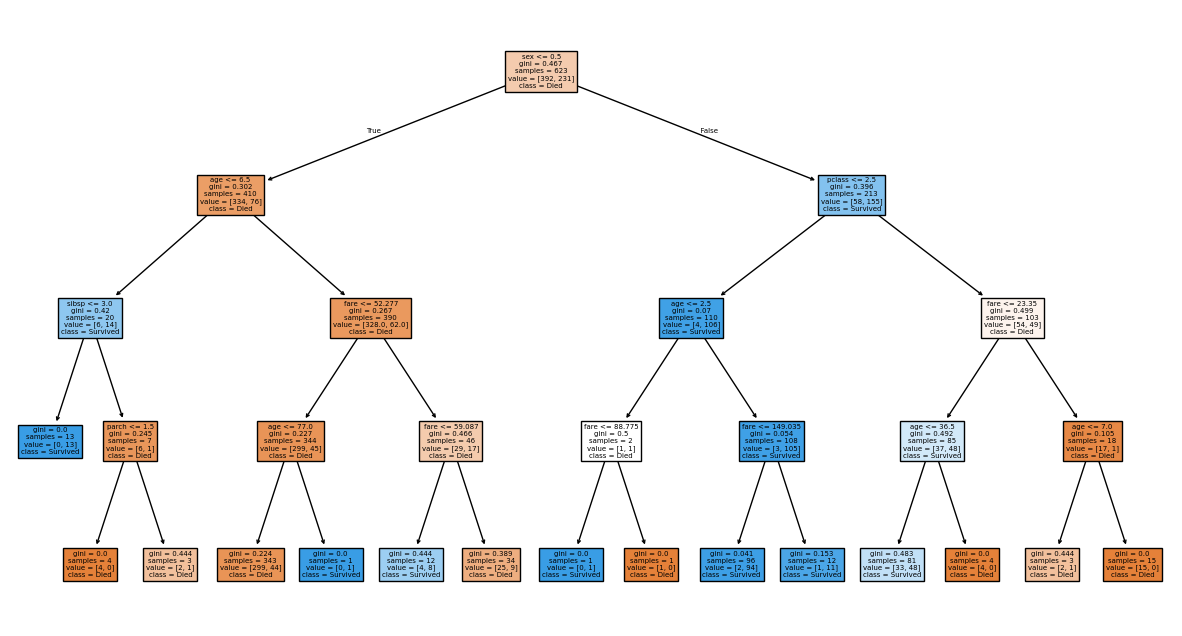

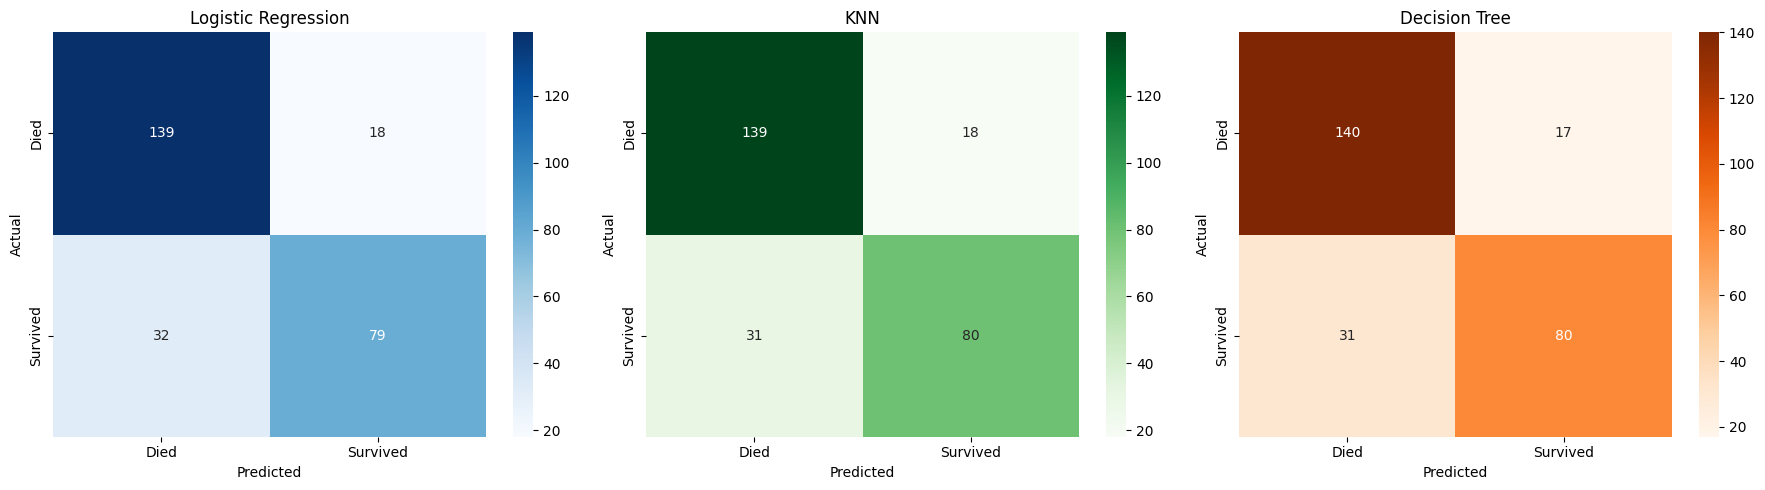

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load Titanic dataset
df = sns.load_dataset('titanic')

print(df.head())
print(df.info())

df = df[['survived','pclass','sex','age','sibsp','parch','fare']]

df['age'] = df['age'].fillna(df['age'].median())
df.dropna(inplace=True)

df['sex'] = df['sex'].map({'male':0, 'female':1})

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Model 1 -> Logistic Regression
lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


#Model 2 -> KNN
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("\nKNN (k=5)")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


#Model 3 -> Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("\nDecision Tree")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


#Comparing all models Accuracies
results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt)
    ]
})

print(results)

#Visualization
plt.figure(figsize=(15,8))

plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['Died','Survived'],
    filled=True
)

plt.show()

#HeatMaps
# Create figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Logistic Regression
sns.heatmap(
    confusion_matrix(y_test, y_pred_lr),
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[0],
    xticklabels=["Died","Survived"],
    yticklabels=["Died","Survived"]
)
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# KNN
sns.heatmap(
    confusion_matrix(y_test, y_pred_knn),
    annot=True,
    fmt='d',
    cmap='Greens',
    ax=axes[1],
    xticklabels=["Died","Survived"],
    yticklabels=["Died","Survived"]
)
axes[1].set_title("KNN")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Decision Tree
sns.heatmap(
    confusion_matrix(y_test, y_pred_dt),
    annot=True,
    fmt='d',
    cmap='Oranges',
    ax=axes[2],
    xticklabels=["Died","Survived"],
    yticklabels=["Died","Survived"]
)
axes[2].set_title("Decision Tree")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()
